# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** Cloudya Filia Putri
- **Email:** cloudyafilia@gmail.com
- **ID Dicoding:** Cloudya Filia Putri

## Menentukan Pertanyaan Bisnis

**Best and Worst Performing Time Periods**
1. Pada jam, hari, dan bulan apa saja peminjaman sepeda mencapai titik tertinggi dan terendah selama tahun 2011-2012?

**Weather Impact on Bike Rentals**
2. Seberapa besar pengaruh musim dan kondisi cuaca terhadap jumlah peminjaman sepeda selama tahun 2011-2012?

**Customer Demographics**
3. Bagaimana distribusi peminjaman sepeda antara pelanggan terdaftar dan pelanggan kasual pada hari kerja dibandingkan akhir pekan dalam periode 2011-2012?


## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

## Data Wrangling

### Gathering Data

Pada tahap gathering data, dataset **day.csv** dan **hour.csv** dikonversi ke dalam bentuk **DataFrame** menggunakan **library pandas** untuk mempermudah manipulasi, analisis, dan visualisasi data.

#### Load Day Dataset




In [4]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Load Hour Dataset

In [5]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Pada tahap assessing data, kedua DataFrame dievaluasi untuk menilai kesiapan dataset sebelum dilakukan analisis, termasuk pengecekan missing values, inkonsistensi, dan duplikasi.

#### Menilai tabel day_df

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


##### Menganalisis Missing Value

In [7]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


##### Menganalisis Duplikasi Data

In [8]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


##### Mengeksplorasi Parameter Statistik

In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000



**Hasil Assessing Data – Tabel Day**  

Dataframe ini tidak memiliki nilai Null dan duplikasi. Namun, terdapat kesalahan tipe data pada kolom 'dteday', yang seharusnya 'date', tetapi tercatat sebagai 'object'. Selain itu, diperlukan perubahan nama beberapa kolom agar lebih jelas dan sesuai dengan isi datanya.

#### Menilai tabel hour_df

In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


##### Menganalisis Missing Value

In [11]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


##### Menganalisis Duplikasi Data

In [12]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


##### Mengeksplorasi Parameter Statistik

In [13]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Hasil Assessing Data – Tabel Hour**  

Dataframe ini tidak memiliki nilai Null dan duplikasi. Namun, terdapat kesalahan tipe data pada kolom 'dteday', yang seharusnya 'date', tetapi tercatat sebagai 'object'. Selain itu, diperlukan perubahan nama beberapa kolom agar lebih jelas dan sesuai dengan isi datanya.

### Cleaning Data

Pada tahap ini, kedua dataframe akan dibersihkan dengan mengubah tipe data kolom 'dteday' menjadi 'datetime' untuk memastikan konsistensi data sebelum analisis dan mengganti beberapa nama kolom supaya lebih jelas dan sesuai dengan isi datanya.

#### Membersihkan tabel day_df

##### Mengatasi Kesalahan Tipe Data dteday

In [14]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

##### Memperbaiki Judul Kolom

In [15]:
day_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'hum': 'humidity',
    'temp': 'temperature',
    'atemp': 'feeling_temperature',
    'cnt': 'total_rental',
    'casual': 'casual_users',
    'registered': 'registered_users'
}, inplace=True)

##### Ringkasan Data Setelah Dibersihkan

In [16]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   instant              731 non-null    int64         
 1   date                 731 non-null    datetime64[ns]
 2   season               731 non-null    int64         
 3   year                 731 non-null    int64         
 4   month                731 non-null    int64         
 5   holiday              731 non-null    int64         
 6   weekday              731 non-null    int64         
 7   workingday           731 non-null    int64         
 8   weathersit           731 non-null    int64         
 9   temperature          731 non-null    float64       
 10  feeling_temperature  731 non-null    float64       
 11  humidity             731 non-null    float64       
 12  windspeed            731 non-null    float64       
 13  casual_users         731 non-null  

##### Menyimpan Data Hasil Cleaning

In [17]:
# Display cleaned data preview
print("\nCleaned Data Preview:")
print(day_df.head())

# Save cleaned data for further analysis
cleaned_file_path = 'Cleaned_Project IDCamp Bike Sharing (day).csv'
day_df.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned data saved to: {cleaned_file_path}")


Cleaned Data Preview:
   instant       date  season  year  month  holiday  weekday  workingday  \
0        1 2011-01-01       1     0      1        0        6           0   
1        2 2011-01-02       1     0      1        0        0           0   
2        3 2011-01-03       1     0      1        0        1           1   
3        4 2011-01-04       1     0      1        0        2           1   
4        5 2011-01-05       1     0      1        0        3           1   

   weathersit  temperature  feeling_temperature  humidity  windspeed  \
0           2     0.344167             0.363625  0.805833   0.160446   
1           2     0.363478             0.353739  0.696087   0.248539   
2           1     0.196364             0.189405  0.437273   0.248309   
3           1     0.200000             0.212122  0.590435   0.160296   
4           1     0.226957             0.229270  0.436957   0.186900   

   casual_users  registered_users  total_rental  
0           331               654    

#### Membersihkan tabel hour_df

##### Menganatasi Kesalahan Tipe Data dteday

In [18]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

##### Memperbaiki Judul Kolom

In [19]:
hour_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'hum': 'humidity',
    'temp': 'temperature',
    'atemp': 'feeling_temperature',
    'cnt': 'total_rental',
    'casual': 'casual_users',
    'registered': 'registered_users'
}, inplace=True)

##### Ringkasan Data Setelah Dibersihkan

In [20]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   instant              17379 non-null  int64         
 1   date                 17379 non-null  datetime64[ns]
 2   season               17379 non-null  int64         
 3   year                 17379 non-null  int64         
 4   month                17379 non-null  int64         
 5   hour                 17379 non-null  int64         
 6   holiday              17379 non-null  int64         
 7   weekday              17379 non-null  int64         
 8   workingday           17379 non-null  int64         
 9   weathersit           17379 non-null  int64         
 10  temperature          17379 non-null  float64       
 11  feeling_temperature  17379 non-null  float64       
 12  humidity             17379 non-null  float64       
 13  windspeed            17379 non-

##### Menyimpan Data Hasil Cleaning

In [21]:
# Display cleaned data preview
print("\nCleaned Data Preview:")
print(hour_df.head())

# Save cleaned data for further analysis
cleaned_file_path = 'Cleaned_Project IDCamp Bike Sharing (hour).csv'
hour_df.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned data saved to: {cleaned_file_path}")


Cleaned Data Preview:
   instant       date  season  year  month  hour  holiday  weekday  \
0        1 2011-01-01       1     0      1     0        0        6   
1        2 2011-01-01       1     0      1     1        0        6   
2        3 2011-01-01       1     0      1     2        0        6   
3        4 2011-01-01       1     0      1     3        0        6   
4        5 2011-01-01       1     0      1     4        0        6   

   workingday  weathersit  temperature  feeling_temperature  humidity  \
0           0           1         0.24               0.2879      0.81   
1           0           1         0.22               0.2727      0.80   
2           0           1         0.22               0.2727      0.80   
3           0           1         0.24               0.2879      0.75   
4           0           1         0.24               0.2879      0.75   

   windspeed  casual_users  registered_users  total_rental  
0        0.0             3                13            

##### Menyimpan Gabungan Data Hasil Cleaning

In [22]:
day_df = pd.read_csv("Cleaned_Project IDCamp Bike Sharing (day).csv")
hour_df = pd.read_csv("Cleaned_Project IDCamp Bike Sharing (hour).csv")

# Gabungkan berdasarkan 'dteday'
all_df = pd.merge(hour_df, day_df, on='date', how='inner', suffixes=('_hour', '_day'))

# Tampilkan hasil
print("\nMerged Data Preview:")
print(all_df.head())

# Simpan dataset gabungan
merged_file_path = "Merged_Bike_Sharing_Data.csv"
all_df.to_csv(merged_file_path, index=False)
print(f"\nMerged data saved to: {merged_file_path}")



Merged Data Preview:
   instant_hour        date  season_hour  year_hour  month_hour  hour  \
0             1  2011-01-01            1          0           1     0   
1             2  2011-01-01            1          0           1     1   
2             3  2011-01-01            1          0           1     2   
3             4  2011-01-01            1          0           1     3   
4             5  2011-01-01            1          0           1     4   

   holiday_hour  weekday_hour  workingday_hour  weathersit_hour  ...  \
0             0             6                0                1  ...   
1             0             6                0                1  ...   
2             0             6                0                1  ...   
3             0             6                0                1  ...   
4             0             6                0                1  ...   

   weekday_day  workingday_day  weathersit_day  temperature_day  \
0            6               0         

## Exploratory Data Analysis (EDA)

Pada tahap Exploratory Data Analysis (EDA), dataframe yang telah dibersihkan akan dieksplorasi lebih lanjut untuk memahami pola dan karakteristik data.

In [33]:
day_df.describe(include='all')

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,feeling_temperature,humidity,windspeed,casual_users,registered_users,total_rental
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Berdasarkan data peminjaman sepeda dari tahun 2011 hingga 2012, jumlah peminjaman paling sedikit dalam satu jam adalah **2 peminjaman**, sementara jumlah peminjaman tertinggi dalam satu jam mencapai **891 peminjaman**, dengan standar deviasi sebesar **193.72**. Tren peminjaman juga menunjukkan variasi berdasarkan hari dan bulan, di mana peminjaman cenderung lebih tinggi pada jam sibuk dan bulan dengan kondisi cuaca atau musim yang lebih mendukung.

In [34]:
hour_df.describe(include='all')

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,feeling_temperature,humidity,windspeed,casual_users,registered_users,total_rental
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Berdasarkan data peminjaman sepeda per jam dari tahun 2011 hingga 2012, jumlah peminjaman paling sedikit dalam satu jam adalah **1 peminjaman**, sementara jumlah peminjaman tertinggi dalam satu jam mencapai **977 peminjaman**, dengan standar deviasi sebesar **181.38**. Rata-rata peminjaman sepeda per jam tercatat sekitar **189 peminjaman**, dengan jumlah peminjaman yang lebih tinggi pada jam-jam sibuk dan hari kerja, serta dipengaruhi oleh faktor musim dan kondisi cuaca.

### Explore Best & Worst Performing Time Periods

In [25]:
# --- 1. Rata-rata Jumlah Peminjaman per Jam ---

hour_df.groupby(by="hour").agg({
    "total_rental": ["max", "min", "mean", "std"]
})

total_rental                            
              max min        mean         std
hour                                         
0             283   2   53.898072   42.307910
1             168   1   33.375691   33.538727
2             132   1   22.869930   26.578642
3              79   1   11.727403   13.239190
4              28   1    6.352941    4.143818
5              66   1   19.889819   13.200765
6             213   1   76.044138   55.084348
7             596   1  212.064649  161.441936
8             839   5  359.011004  235.189285
9             426  14  219.309491   93.703458
10            539   8  173.668501  102.205413
11            663  10  208.143054  127.495536
12            776   3  253.315934  145.081134
13            760  11  253.661180  148.107657
14            750  12  240.949246  147.271574
15            750   7  251.233196  144.632541
16            783  11  311.983562  148.682618
17            976  15  461.452055  232.656611
18            977  23  425.510989  224.639304
19            743  11  311.523352  161.050359
20            567  11  226.030220  119.670164
21            584   6  172.314560   89.788893
22            502   9  131.335165   69.937782
23            256   2   87.831044   50.846889

Berdasarkan tabel di atas, rata-rata peminjaman sepeda tertinggi terjadi pada pukul **5 p.m.**, **6 p.m.**, dan **7 p.m.**. Sebaliknya, rata-rata peminjaman sepeda terendah terjadi pada pukul **4 a.m.**, **3 a.m.**, dan **2 a.m.**. Pola ini menunjukkan bahwa peminjaman sepeda cenderung meningkat pada sore hingga malam hari, kemungkinan karena banyak orang pulang kerja atau beraktivitas, sementara peminjaman menurun drastis pada dini hari ketika aktivitas masyarakat lebih sedikit.

In [26]:
# --- 2. Rata-rata Jumlah Peminjaman per Hari ---

day_df.groupby(by="weekday").agg({
    "total_rental": ["max", "min", "mean", "std"]
})

total_rental                                
                 max   min         mean          std
weekday                                             
0               8227   605  4228.828571  1872.496629
1               7525    22  4338.123810  1793.074013
2               7767   683  4510.663462  1826.911642
3               8173   441  4548.538462  2038.095884
4               7804   431  4667.259615  1939.433317
5               8362  1167  4690.288462  1874.624870
6               8714   627  4550.542857  2196.693009

 Berdasarkan tabel di atas, rata-rata peminjaman sepeda tertinggi terjadi pada **hari Jumat**, yaitu sebanyak 4690,29 Sebaliknya, rata-rata peminjaman terendah terjadi pada **hari Minggu** sebanyak 4338,12. Pola ini menunjukkan bahwa peminjaman sepeda cenderung meningkat pada hari kerja menjelang akhir pekan, terutama Kamis dan Jumat, kemungkinan karena orang-orang lebih banyak beraktivitas di luar menjelang akhir pekan. Sementara itu, peminjaman menurun pada hari Minggu, mungkin karena sebagian besar masyarakat lebih memilih beristirahat di rumah setelah beraktivitas selama seminggu.

In [27]:
# --- 3. Rata-rata Jumlah Peminjaman per Bulan ---

day_df.groupby(by="month").agg({
    "total_rental": ["max", "min", "mean", "std"]
})

total_rental                                
               max   min         mean          std
month                                             
1             4521   431  2176.338710  1161.674370
2             5062  1005  2655.298246  1145.313307
3             8362   605  3692.258065  1899.301812
4             7460   795  4484.900000  1776.160778
5             8294  2633  5349.774194  1298.711561
6             8120  3767  5772.366667  1240.400031
7             8173  3285  5563.677419  1273.751871
8             7865  1115  5664.419355  1494.516146
9             8714  1842  5766.516667  1810.130649
10            8156    22  5199.225806  1988.392517
11            6852  1495  4247.183333  1285.712709
12            6606   441  3403.806452  1549.639353

Berdasarkan tabel di atas, rata-rata peminjaman sepeda tertinggi terjadi pada **bulan Juni**, **September**, dan **Agustus**. Sebaliknya, rata-rata peminjaman sepeda terendah terjadi pada **bulan Januari**, **Februari**, dan **Desember**. Pola ini menunjukkan bahwa peminjaman sepeda cenderung meningkat pada **pertengahan tahun hingga awal musim gugur** (Juni–September), yang kemungkinan disebabkan oleh kondisi cuaca yang lebih mendukung untuk bersepeda. Sebaliknya, peminjaman menurun pada **awal tahun dan akhir tahun** (Januari, Februari, dan Desember), yang bisa jadi karena kondisi cuaca yang lebih dingin dan kurang mendukung untuk aktivitas luar ruangan.

### Explore Weather Impact on Bike Rentals

In [28]:
# --- 1. Penggunaan Pelanggan Berdasarkan Musim ---

day_df.groupby(by="season").agg({
    "date": "nunique",
    "total_rental": ["max", "min", "mean", "std"]
})

date total_rental                                
       nunique          max   min         mean          std
season                                                     
1          181         7836   431  2604.132597  1399.942119
2          184         8362   795  4992.331522  1695.977235
3          188         8714  1115  5644.303191  1459.800381
4          178         8555    22  4728.162921  1699.615261

Berdasarkan tabel di atas, rata-rata peminjaman sepeda tertinggi terjadi pada **musim gugur**, diikuti oleh **musim panas** dan **musim dingin**. Sementara itu, rata-rata peminjaman sepeda terendah terjadi pada **musim semi**. Pola ini menunjukkan bahwa peminjaman sepeda cenderung meningkat selama **musim gugur**, kemungkinan karena kondisi cuaca yang lebih nyaman untuk bersepeda. Sebaliknya, peminjaman menurun drastis pada **musim semi**, yang mungkin disebabkan oleh faktor cuaca atau perubahan pola aktivitas masyarakat pada musim tersebut.

In [29]:
# --- 2. Penggunaan Pelanggan Berdasarkan Kondisi Cuaca ---

hour_df.groupby(by="weathersit").agg({
    "date": "nunique",
    "total_rental": ["max", "min", "mean", "std"]
})


date total_rental                            
           nunique          max min        mean         std
weathersit                                                 
1              700          977   1  204.869272  189.487773
2              567          957   1  175.165493  165.431589
3              300          891   1  111.579281  133.781045
4                3          164  23   74.333333   77.925178

Berdasarkan tabel di atas, rata-rata peminjaman sepeda tertinggi terjadi pada kondisi cuaca **cerah atau berawan sebagian**. Sementara itu, rata-rata peminjaman sepeda terendah terjadi pada kondisi **hujan deras, badai petir, atau salju lebat**. Pola ini menunjukkan bahwa peminjaman sepeda cenderung lebih tinggi saat cuaca cerah, sedangkan hujan deras dan salju lebat menghambat aktivitas bersepeda secara signifikan.

### Explore Customer Demographics

In [30]:
# --- Total Peminjaman Sepeda pada Weekend dan Weekday oleh Kedua Jenis Pelanggan ---

day_df.groupby(day_df["workingday"].map({0: "Weekend", 1: "Weekday"})).agg({
    "casual_users": ["sum", "max", "min", "mean", "std"],
    "registered_users": ["sum", "max", "min", "mean", "std"]
})


casual_users                                    registered_users  \
                    sum   max min         mean         std              sum   
workingday                                                                    
Weekday          303285  2469   2   606.570000  391.496032          1989125   
Weekend          316732  3410  54  1371.134199  873.064794           683537   

                                                 
             max  min         mean          std  
workingday                                       
Weekday     6946   20  3978.250000  1568.692453  
Weekend     5966  451  2959.034632  1293.867686

Berdasarkan tabel di atas, total peminjaman sepeda lebih tinggi pada **hari kerja** dibandingkan **akhir pekan** untuk kedua jenis pelanggan.  

- **Pelanggan terdaftar** melakukan lebih banyak peminjaman, dengan **1.989.125** peminjaman di akhir pekan dan **683.537** di hari kerja.  
- **Pelanggan biasa** memiliki peminjaman yang lebih seimbang, yaitu **303.285** di akhir pekan dan **316.732** di hari kerja.  

Pola ini menunjukkan bahwa pelanggan terdaftar lebih banyak menggunakan sepeda pada hari kerja, kemungkinan untuk keperluan rutin, sedangkan pelanggan biasa cenderung memakainya untuk rekreasi.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada jam, hari, dan bulan apa saja peminjaman sepeda mencapai titik tertinggi dan terendah selama tahun 2011-2012?

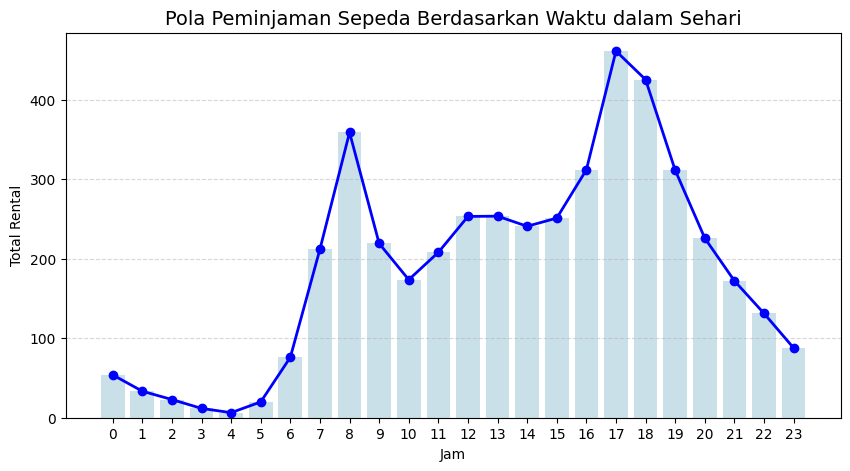

In [76]:
# --- 1. Visualisasi Tren Peminjaman Sepeda per Jam ---

# Membuat figure
plt.figure(figsize=(10, 5))

# Warna untuk bar chart dan garis tren
bar_color = "lightblue"
line_color = "blue"

# Menghitung rata-rata peminjaman sepeda per jam
hourly_rentals = hour_df.groupby('hour')['total_rental'].mean().reset_index()
hourly_rentals.rename(columns={'total_rental': 'average_rentals'}, inplace=True)

# Membuat bar chart
ax = sns.barplot(x='hour', y='average_rentals', data=hourly_rentals, color=bar_color, alpha=0.7)

# Mendapatkan posisi tengah tiap bar
bar_positions = np.arange(len(hourly_rentals))

# Menambahkan garis tren di atas bar
plt.plot(bar_positions, hourly_rentals['average_rentals'], marker='o', linewidth=2, color=line_color)

# Menambahkan judul dan label
plt.title("Pola Peminjaman Sepeda Berdasarkan Waktu dalam Sehari", fontsize=14)
plt.xlabel("Jam")
plt.ylabel("Total Rental")

# Mengatur ticks untuk sumbu x
plt.xticks(ticks=bar_positions, labels=hourly_rentals['hour'])

# Menambahkan grid di sumbu Y
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


**Insight:**

Tren peminjaman sepeda menunjukkan dua puncak utama, yaitu pada pukul 7-8 pagi dan 17-18 sore, yang kemungkinan besar terkait dengan jam berangkat dan pulang kerja. Sementara itu, peminjaman cenderung rendah pada dini hari, terutama antara pukul 2-5 pagi, ketika aktivitas masyarakat minim.

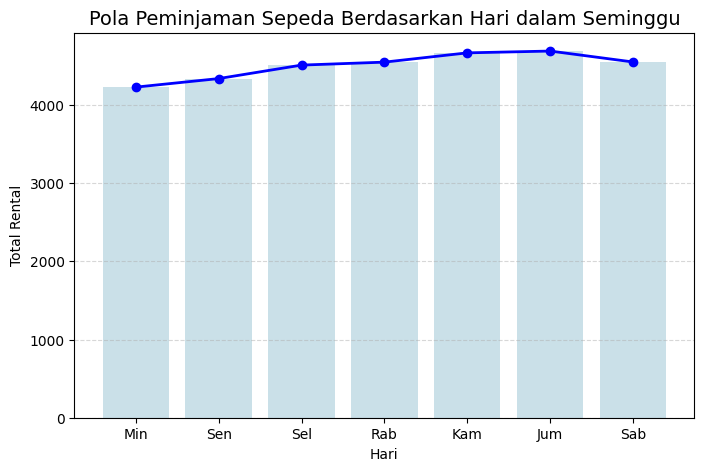

In [77]:
# --- 2. Visualisasi Tren Peminjaman Sepeda per Hari ---

# Membuat figure
plt.figure(figsize=(8, 5))

# Warna untuk bar chart dan garis tren
bar_color = "lightblue"
line_color = "blue"

# Menghitung rata-rata peminjaman sepeda per hari
weekly_rentals = day_df.groupby('weekday')['total_rental'].mean().reset_index()
weekly_rentals.rename(columns={'total_rental': 'average_rentals_daily'}, inplace=True)

# Bar chart
ax = sns.barplot(x='weekday', y='average_rentals_daily', data=weekly_rentals, color=bar_color, alpha=0.7)

# Menambahkan garis tren di atas bar
bar_positions = np.arange(len(weekly_rentals))
plt.plot(bar_positions, weekly_rentals['average_rentals_daily'], marker='o', linewidth=2, color=line_color)

# Menambahkan judul dan label
plt.title("Pola Peminjaman Sepeda Berdasarkan Hari dalam Seminggu", fontsize=14)
plt.xlabel("Hari")
plt.ylabel("Total Rental")

# Mengatur label untuk sumbu x
plt.xticks(ticks=bar_positions, labels=['Min', 'Sen', 'Sel', 'Rab', 'Kam', 'Jum', 'Sab'])

# Menambahkan grid di sumbu Y
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Menampilkan plot
plt.show()

**Insight:**

Grafik menunjukkan peminjaman sepeda stabil sepanjang minggu, dengan puncaknya pada hari Jumat dan Sabtu, sementara hari Minggu sedikit menurun. Peningkatan di akhir pekan kemungkinan karena lebih banyak aktivitas rekreasi, sedangkan penurunan pada hari Minggu bisa disebabkan oleh berkurangnya mobilitas. Meski demikian, perbedaannya tidak signifikan, menunjukkan penggunaan yang konsisten setiap hari.

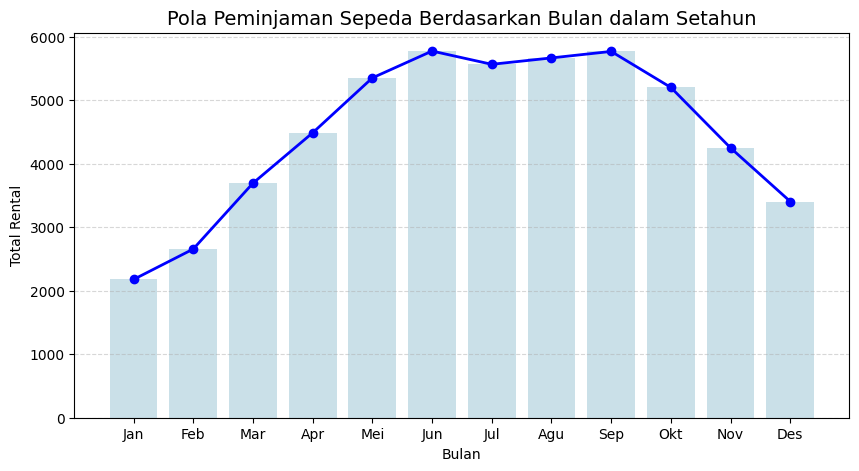

In [78]:
# --- 3. Visualisasi Tren Peminjaman Sepeda per Bulan ---

# Menghitung rata-rata peminjaman sepeda per bulan
monthly_rentals = day_df.groupby('month')['total_rental'].mean().reset_index()
monthly_rentals.rename(columns={'total_rental': 'average_rentals_daily'}, inplace=True)
monthly_rentals = monthly_rentals.sort_values(by='month')

# Membuat figure
plt.figure(figsize=(10, 5))

# Bar chart
sns.barplot(x='month', y='average_rentals_daily', data=monthly_rentals, color='lightblue', alpha=0.7)

# Menambahkan garis tren di atas bar
plt.plot(monthly_rentals['month'] - 1,
         monthly_rentals['average_rentals_daily'],
         color='blue', marker='o', linestyle='-', linewidth=2, markersize=6)

# Menambahkan judul dan label
plt.title("Pola Peminjaman Sepeda Berdasarkan Bulan dalam Setahun", fontsize=14)
plt.xlabel("Bulan")
plt.ylabel("Total Rental")

# Mengatur label untuk sumbu x
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])

# Menambahkan grid di sumbu Y
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Menampilkan plot
plt.show()

**Insight:**

Grafik menunjukkan bahwa peminjaman sepeda mencapai puncaknya pada bulan Juni hingga September, dengan jumlah tertinggi di bulan Juni. Sebaliknya, jumlah peminjaman terendah terjadi pada bulan Januari dan Desember. Tren ini kemungkinan dipengaruhi oleh perubahan musim, di mana bulan-bulan dengan cuaca lebih hangat cenderung meningkatkan aktivitas luar ruangan, sementara musim dingin mengurangi penggunaan sepeda.

### Pertanyaan 2: Seberapa besar pengaruh musim dan kondisi cuaca terhadap jumlah peminjaman sepeda selama tahun 2011-2012?

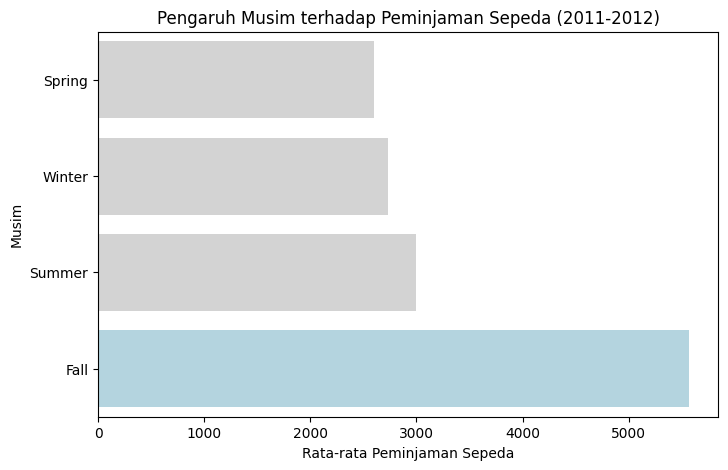

In [39]:
# --- 1. Visualisasi Pola Penggunaan Pelanggan Berdasarkan Musim --

# Menginput data
data = {
    "season": ["Winter", "Spring", "Summer", "Fall"],
    "mean_rental": [2728.16, 2604.13, 2992.33, 5564.30]
}
df = pd.DataFrame(data)
df = df.sort_values(by="mean_rental", ascending=True)

# Memberi highlight untuk musim dengan peminjaman tertinggi
colors = ["lightgrey" if season != "Fall" else "lightblue" for season in df["season"]]

# Bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x="mean_rental", y="season", data=df, palette=colors)

# Menambahkan judul dan label
plt.title("Pengaruh Musim terhadap Peminjaman Sepeda")
plt.xlabel("Rata-rata Peminjaman Sepeda")
plt.ylabel("Musim")

# Menampilkan plot
plt.show()

**Insight:**

Peminjaman sepeda tertinggi terjadi pada musim gugur (fall), jauh melampaui musim lainnya. Sementara itu, musim panas (summer) memiliki jumlah peminjaman lebih tinggi dibandingkan musim dingin (winter) dan musim semi (spring), yang memiliki tingkat peminjaman hampir serupa. Hal ini menunjukkan bahwa kondisi cuaca pada musim gugur mungkin lebih kondusif bagi aktivitas bersepeda dibandingkan musim lainnya.

<ipython-input-79-d364af3939fa>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="mean_rental", y="weathersit", data=df, palette=colors)


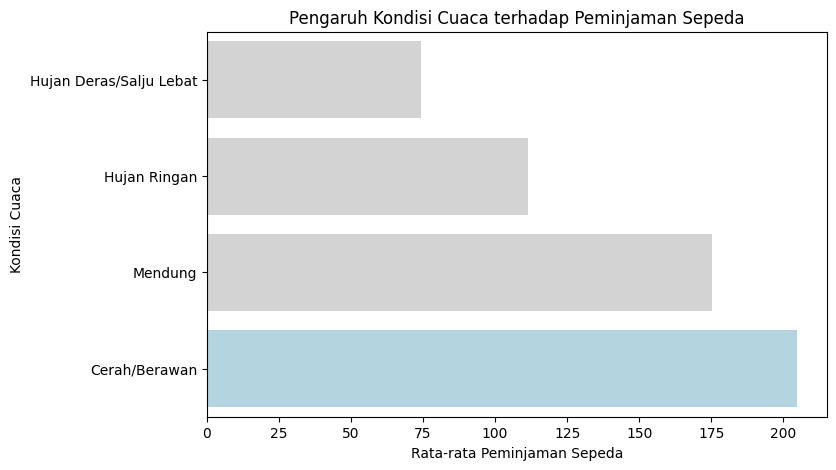

In [79]:
# --- 2. Visualisasi Pola Penggunaan Pelanggan Berdasarkan Cuaca --

# Data dari tabel
data = {
    "weathersit": ["Cerah/Berawan", "Mendung", "Hujan Ringan", "Hujan Deras/Salju Lebat"],
    "mean_rental": [204.87, 175.16, 111.57, 74.33]  # Sesuai tabel
}

# Konversi ke DataFrame
df = pd.DataFrame(data)

# Urutkan berdasarkan rata-rata peminjaman sepeda
df = df.sort_values(by="mean_rental", ascending=True)

# Warna khusus untuk kondisi cuaca dengan peminjaman tertinggi
colors = ["lightgrey" if condition != "Cerah/Berawan" else "lightblue" for condition in df["weathersit"]]

# Membuat bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x="mean_rental", y="weathersit", data=df, palette=colors)

# Menambahkan judul dan label
plt.title("Pengaruh Kondisi Cuaca terhadap Peminjaman Sepeda")
plt.xlabel("Rata-rata Peminjaman Sepeda")
plt.ylabel("Kondisi Cuaca")

# Menampilkan plot
plt.show()

**Insight:**

Peminjaman sepeda tertinggi terjadi pada cuaca cerah atau berawan, sementara peminjaman menurun saat kondisi cuaca memburuk. Cuaca mendung masih memungkinkan jumlah peminjaman yang cukup tinggi, tetapi saat hujan ringan terjadi penurunan signifikan. Peminjaman terendah terjadi pada kondisi hujan deras atau salju lebat, menunjukkan bahwa cuaca ekstrem berdampak besar pada aktivitas bersepeda.

### Pertanyaan 4: Bagaimana distribusi peminjaman sepeda antara pelanggan terdaftar dan pelanggan biasa pada hari kerja dibandingkan akhir pekan dalam periode 2011-2012?

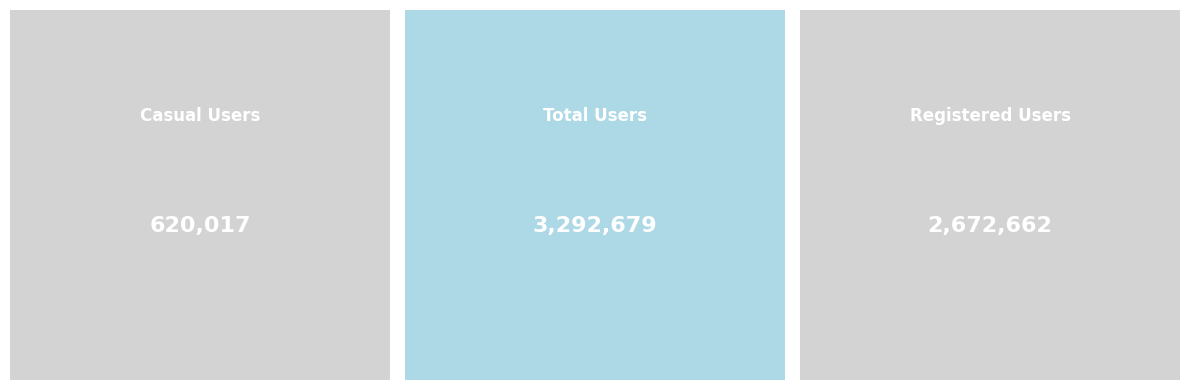

In [81]:
# --- Visualisasi Ringkasan Customer Demographics ---

# Membuat metrik
total_rental = day_df["total_rental"].sum()
casual_users = day_df["casual_users"].sum()
registered_users = day_df["registered_users"].sum()
metrics = {
    "Casual Users": casual_users,
    "Total Users": total_rental,
    "Registered Users": registered_users
}
colors = ["#D3D3D3", "#ADD8E6", "#D3D3D3"]

# Membuat visualisasi
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

for i, (key, value) in enumerate(metrics.items()):
    ax[i].set_facecolor(colors[i])
    ax[i].text(0.5, 0.7, key, fontsize=12, fontweight="bold", ha="center", color="white")
    ax[i].text(0.5, 0.4, f"{value:,.0f}", fontsize=16, fontweight="bold", ha="center", color="white")
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["right"].set_visible(False)
    ax[i].spines["left"].set_visible(False)
    ax[i].spines["bottom"].set_visible(False)

# Menampilkan plot
plt.tight_layout()
plt.show()

**Insights:**

Grafik ini menunjukkan total 3.292.679 pengguna layanan penyewaan sepeda, terdiri dari 620.017 pengguna kasual dan 2.672.662 pengguna terdaftar. Mayoritas adalah pelanggan terdaftar, yang kemungkinan besar menggunakan layanan secara rutin, sementara pengguna kasual lebih sedikit dan cenderung menyewa sesekali. Tren ini dapat menjadi pertimbangan dalam strategi pemasaran dan pengembangan layanan ke depan.

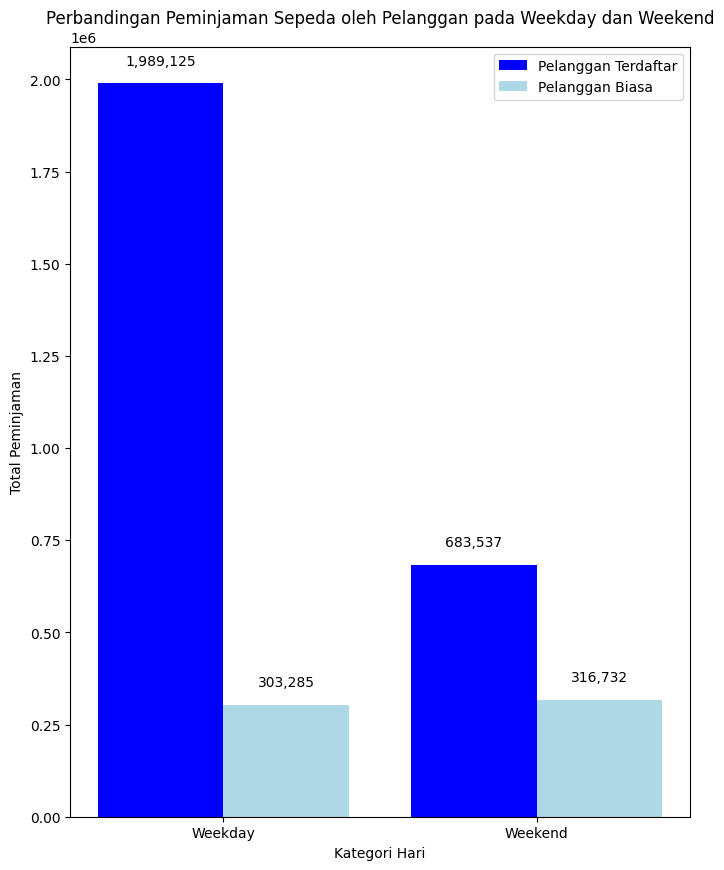

In [82]:
# --- Visualisasi Peminjaman Sepeda pada Weekend dan Weekday oleh Kedua Jenis Pengguna ---

# Mengelompokkan data berdasarkan weekday/weekend
agg_data = day_df.groupby(day_df["workingday"].map({0: "Weekend", 1: "Weekday"})).agg({
    "casual_users": ["sum"],
    "registered_users": ["sum"]
})

# Mengambil nilai total peminjaman dari tabel
casual_users = agg_data["casual_users"]["sum"].values
registered_users = agg_data["registered_users"]["sum"].values
categories = agg_data.index.tolist()

# Menentukan posisi sumbu x
x = np.arange(len(categories))

# Bar plot
plt.figure(figsize=(8, 10))
plt.bar(x - 0.2, registered_users, width=0.4, label="Pelanggan Terdaftar", color="blue")
plt.bar(x + 0.2, casual_users, width=0.4, label="Pelanggan Biasa", color="lightblue")

# Menambahkan label dan judul
plt.xticks(x, categories)
plt.ylabel("Total Peminjaman")
plt.xlabel("Kategori Hari")
plt.title("Perbandingan Peminjaman Sepeda oleh Pelanggan pada Weekday dan Weekend")
plt.legend()

# Menampilkan nilai di atas setiap bar
for i in range(len(categories)):
    plt.text(x[i] - 0.2, registered_users[i] + 50000, f"{registered_users[i]:,}", ha='center', fontsize=10, color='black')
    plt.text(x[i] + 0.2, casual_users[i] + 50000, f"{casual_users[i]:,}", ha='center', fontsize=10, color='black')

# Menampilkan plot
plt.show()

**Insight:**

Pelanggan terdaftar lebih dominan dalam peminjaman sepeda dibandingkan pelanggan biasa, terutama pada hari kerja. Peminjaman oleh pelanggan terdaftar jauh lebih tinggi pada hari kerja dibandingkan akhir pekan, kemungkinan besar karena mereka menggunakan sepeda untuk keperluan rutin seperti perjalanan kerja atau sekolah. Sebaliknya, pelanggan biasa menunjukkan jumlah peminjaman yang relatif stabil antara hari kerja dan akhir pekan, dengan sedikit peningkatan di akhir pekan. Hal ini menunjukkan bahwa pelanggan biasa cenderung menggunakan sepeda untuk rekreasi atau keperluan non-rutin.

## Analisis Lanjutan (Opsional)

 ### Visualisasi scatter plot pengaruh suhu, suhu terasa, kelembapan, dan kecepatan angin terhadap total peminjaman sepeda

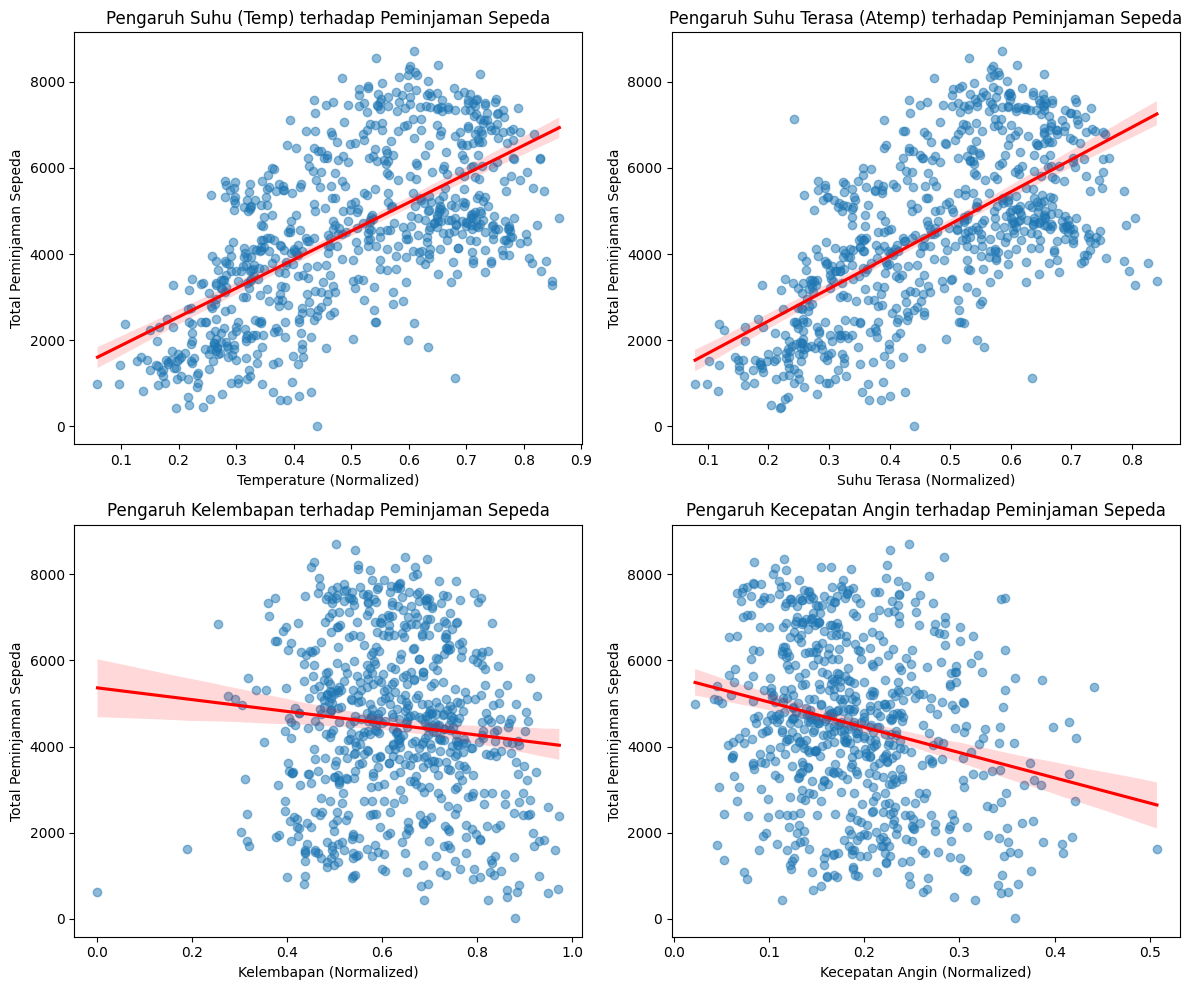

In [83]:
# --- Visualisasi Hubungan suhu, suhu terasa, kelembapan, dan kecepatan angin terhadap total rental ---

# Membuat figure dan axes untuk 4 subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Scatter plot Temp vs CNT
sns.regplot(x=day_df['temperature'], y=day_df['total_rental'], ax=axes[0, 0], scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
axes[0, 0].set_title("Pengaruh Suhu (Temp) terhadap Peminjaman Sepeda")
axes[0, 0].set_xlabel("Temperature (Normalized)")
axes[0, 0].set_ylabel("Total Peminjaman Sepeda")

# Scatter plot Atemp vs CNT
sns.regplot(x=day_df['feeling_temperature'], y=day_df['total_rental'], ax=axes[0, 1], scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
axes[0, 1].set_title("Pengaruh Suhu Terasa (Atemp) terhadap Peminjaman Sepeda")
axes[0, 1].set_xlabel("Suhu Terasa (Normalized)")
axes[0, 1].set_ylabel("Total Peminjaman Sepeda")

# Scatter plot Humidity vs CNT
sns.regplot(x=day_df['humidity'], y=day_df['total_rental'], ax=axes[1, 0], scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
axes[1, 0].set_title("Pengaruh Kelembapan terhadap Peminjaman Sepeda")
axes[1, 0].set_xlabel("Kelembapan (Normalized)")
axes[1, 0].set_ylabel("Total Peminjaman Sepeda")

# Scatter plot Wind Speed vs CNT
sns.regplot(x=day_df['windspeed'], y=day_df['total_rental'], ax=axes[1, 1], scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
axes[1, 1].set_title("Pengaruh Kecepatan Angin terhadap Peminjaman Sepeda")
axes[1, 1].set_xlabel("Kecepatan Angin (Normalized)")
axes[1, 1].set_ylabel("Total Peminjaman Sepeda")

# Menampilkan plot
plt.tight_layout()
plt.show()

**Insight:**

Peminjaman sepeda menunjukkan pola yang dipengaruhi oleh faktor cuaca. Suhu (Temp) dan suhu terasa (Atemp) memiliki korelasi positif dengan jumlah peminjaman, artinya semakin tinggi suhu, semakin banyak sepeda yang dipinjam, kemungkinan karena cuaca hangat lebih nyaman untuk bersepeda. Sebaliknya, kelembapan dan kecepatan angin memiliki korelasi negatif, di mana peningkatan kelembapan dan angin kencang justru menurunkan jumlah peminjaman. Hal ini bisa terjadi karena kondisi lembap atau berangin membuat bersepeda menjadi kurang nyaman atau lebih sulit. Dengan demikian, faktor lingkungan seperti suhu, kelembapan, dan kecepatan angin memiliki pengaruh signifikan terhadap pola penggunaan sepeda, yang dapat menjadi pertimbangan dalam perencanaan layanan penyewaan sepeda.

### RFM (Recency, Frequency, Monetary) Analysis

In [46]:
# --- 1. Recency: Waktu terakhir kali setiap pelanggan melakukan peminjaman sepeda ---

# Menghitung hari terakhir dalam dataset
last_date = day_df['date'].max()

# Menghitung hari terakhir pelanggan meminjam sepeda
recency_df = day_df.groupby('registered_users')['date'].max().reset_index()
recency_df['recency'] = (pd.to_datetime(last_date) - pd.to_datetime(recency_df['date'])).dt.days
recency_df = recency_df[['registered_users', 'recency']]

print("Recency Analysis:\n", recency_df.head())

Recency Analysis:
    registered_users  recency
0                20       63
1               416      704
2               432        5
3               451      372
4               472      705


In [47]:
# --- 2. Frequency: Seberapa sering pelanggan meminjam sepeda ---

frequency_df = day_df.groupby('registered_users')['total_rental'].count().reset_index()
frequency_df.columns = ['registered_users', 'frequency']

print("Frequency Analysis:\n", frequency_df.head())

Frequency Analysis:
    registered_users  frequency
0                20          1
1               416          1
2               432          1
3               451          1
4               472          1


In [48]:
# --- 3. Monetary: Total peminjaman sepeda oleh pelanggan ---

monetary_df = day_df.groupby('registered_users')['total_rental'].sum().reset_index()
monetary_df.columns = ['registered_users', 'monetary']

print("Monetary Analysis:\n", monetary_df.head())

Monetary Analysis:
    registered_users  monetary
0                20        22
1               416       431
2               432       441
3               451       754
4               472       506


In [49]:
# --- Gabungan Recency, Frequency, dan Monetary (RFM) ---

rfm_df = recency_df.merge(frequency_df, on='registered_users').merge(monetary_df, on='registered_users')

print("RFM Analysis:\n", rfm_df.head())

RFM Analysis:
    registered_users  recency  frequency  monetary
0                20       63          1        22
1               416      704          1       431
2               432        5          1       441
3               451      372          1       754
4               472      705          1       506


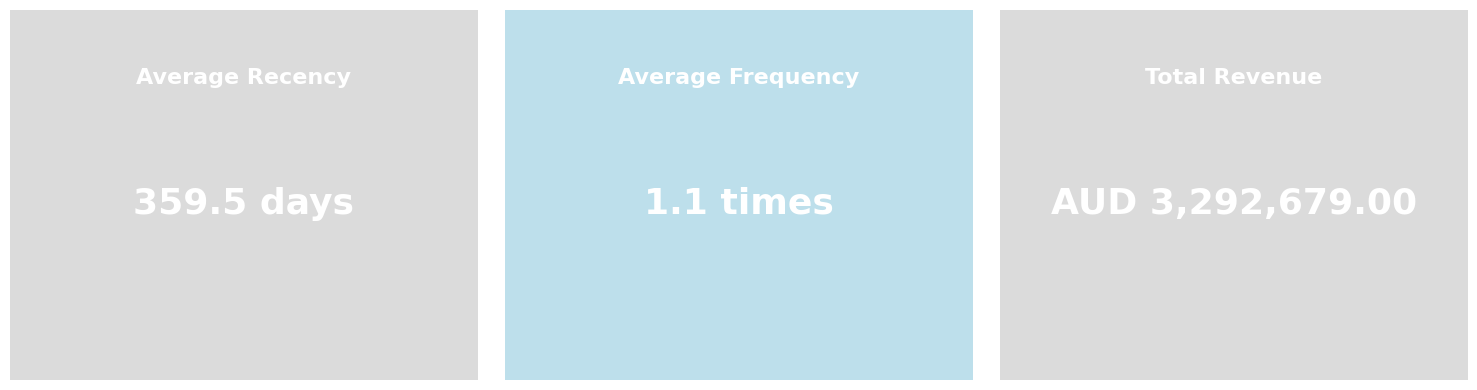

In [68]:
# --- Visualisasi Ringkasan Recency, Frequency, dan Monetary (RFM) ---

# Nilai agregat untuk masing-masing RFM metrics
total_customers = rfm_df.shape[0]
avg_recency = rfm_df['recency'].mean()
avg_frequency = rfm_df['frequency'].mean()
total_monetary = rfm_df['monetary'].sum()

# Membuat figure
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
fig.patch.set_facecolor('white')  # Background putih

# Warna untuk setiap card
colors = ["#D3D3D3", "#ADD8E6", "#D3D3D3"]

# Data KPI untuk ditampilkan
metrics = [
    ("Average Recency", f"{avg_recency:.1f} days", colors[0]),
    ("Average Frequency", f"{avg_frequency:.1f} times", colors[1]),
    ("Total Revenue", f"AUD {total_monetary:,.2f}", colors[2])
]

# Loop untuk membuat 3 KPI Cards
for i, (title, value, color) in enumerate(metrics):
    ax[i].add_patch(patches.FancyBboxPatch(
        (0, 0), 1, 1, boxstyle="round,pad=0.1", edgecolor='none', facecolor=color, alpha=0.8
    ))
    ax[i].text(0.5, 0.8, title, fontsize=16, fontweight='bold', ha='center', color='white')  # Judul lebih besar
    ax[i].text(0.5, 0.45, value, fontsize=26, fontweight='bold', ha='center', color='white')  # Angka utama lebih besar
    ax[i].axis("off")

# Menampilkan plot
plt.tight_layout()
plt.show()

**Insight:**

Grafik ini menampilkan metrik utama bisnis, yaitu **Average Recency** sebesar 359,5 hari, **Average Frequency** sebesar 1,1 kali, dan **Total Revenue** sebesar AUD 3.292.679,00. Rata-rata recency yang tinggi menunjukkan bahwa pelanggan cenderung jarang melakukan transaksi ulang, sementara frekuensi penggunaan yang rendah mengindikasikan bahwa sebagian besar pelanggan tidak sering bertransaksi. Hal ini bisa menjadi perhatian dalam strategi retensi pelanggan dan peningkatan loyalitas untuk mendorong penggunaan layanan yang lebih sering.

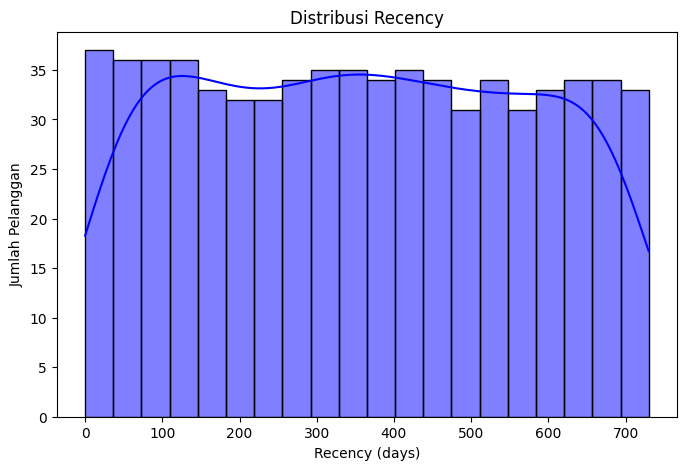

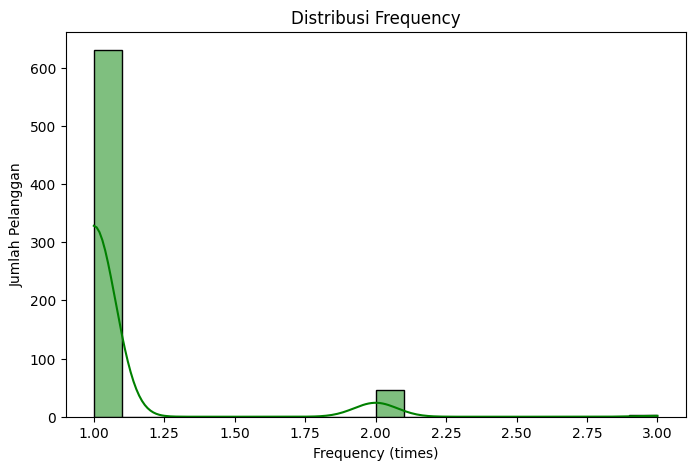

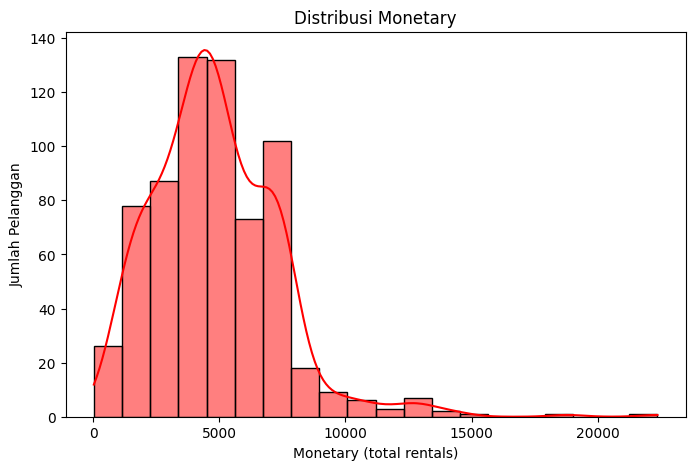

In [75]:
# --- Visualisasi Recency, Frequency, dan Monetary (RFM) ---

# Histogram Recency
plt.figure(figsize=(8, 5))
sns.histplot(rfm_df['recency'], bins=20, kde=True, color='blue')
plt.title('Distribusi Recency')
plt.xlabel('Recency (days)')
plt.ylabel('Jumlah Pelanggan')
plt.show()

# Histogram Frequency
plt.figure(figsize=(8, 5))
sns.histplot(rfm_df['frequency'], bins=20, kde=True, color='green')
plt.title('Distribusi Frequency')
plt.xlabel('Frequency (times)')
plt.ylabel('Jumlah Pelanggan')
plt.show()

# Histogram Monetary
plt.figure(figsize=(8, 5))
sns.histplot(rfm_df['monetary'], bins=20, kde=True, color='red')
plt.title('Distribusi Monetary')
plt.xlabel('Monetary (total rentals)')
plt.ylabel('Jumlah Pelanggan')
plt.show()

### **Insight:**
**1. Distribusi Recency:**

Sebagian besar pelanggan terakhir meminjam sepeda dalam rentang waktu yang tersebar merata hingga lebih dari 700 hari yang lalu, menunjukkan adanya banyak pelanggan yang tidak aktif dalam waktu lama. Puncak distribusi terjadi di sekitar awal periode, menunjukkan beberapa pelanggan masih aktif dalam jangka waktu pendek.

**2. Distribusi Frequency:**

Sebagian besar pelanggan hanya meminjam sepeda satu kali, menandakan bahwa mayoritas pengguna bukan pelanggan tetap. Hanya sedikit pelanggan yang memiliki tingkat peminjaman lebih dari sekali, sehingga program loyalitas atau strategi retensi pelanggan mungkin diperlukan.

**3. Distribusi Monetary:**

Nilai total peminjaman menunjukkan pola distribusi yang cenderung miring ke kanan, di mana sebagian besar pelanggan memiliki total peminjaman yang relatif rendah. Ada sedikit pelanggan dengan jumlah peminjaman yang sangat tinggi, dimana pola ini menunjukkan bahwa mayoritas pengguna tidak sering meminjam sepeda, tetapi ada segelintir pelanggan dengan peminjaman sangat tinggi.

## Conclusion

### **1. Pada jam, hari, dan bulan apa saja peminjaman sepeda mencapai titik tertinggi dan terendah selama tahun 2011-2012?**

  Peminjaman sepeda mencapai puncaknya pada sore hingga malam hari, terutama sekitar pukul 17.00-19.00, menunjukkan tingginya penggunaan setelah jam kerja atau sekolah. Secara harian, tren peminjaman relatif stabil sepanjang minggu, dengan sedikit peningkatan pada Jumat dan Sabtu. Secara bulanan, puncak peminjaman terjadi pada musim panas, khususnya di bulan Juni hingga September, sementara titik terendah terjadi pada bulan Desember dan Januari.

### **2. Seberapa besar pengaruh musim dan kondisi cuaca terhadap jumlah peminjaman sepeda selama tahun 2011-2012?**

  Musim dan kondisi cuaca berpengaruh signifikan terhadap jumlah peminjaman sepeda. Musim gugur mencatat jumlah peminjaman tertinggi, sementara pada musim semi dan musim dingin terjadi penurunan. Dari segi cuaca, peminjaman paling banyak terjadi pada kondisi cerah atau berawan, sedangkan hujan deras dan salju menyebabkan penurunan drastis dalam jumlah peminjaman.
  
### **3. Bagaimana distribusi peminjaman sepeda antara pelanggan terdaftar dan pelanggan kasual pada hari kerja dibandingkan akhir pekan dalam periode 2011-2012?**

  Pelanggan terdaftar lebih dominan dalam peminjaman sepeda pada hari kerja, menunjukkan penggunaan yang lebih rutin, seperti untuk bekerja atau sekolah. Sebaliknya, pelanggan biasa lebih aktif pada akhir pekan, yang kemungkinan besar mencerminkan penggunaan untuk keperluan rekreasi. Hal ini menunjukkan adanya perbedaan pola penggunaan antara kedua kelompok pelanggan.

In [67]:
# Menyimpan dataframe 'all_df' dalam bentuk csv untuk menjadi data utama pada pembuatan dashboard

all_df.to_csv("all_data.csv", index=False)